# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Import Weather Keys from Open Weather App
import imp
import imp
config_open_weather = imp.load_source('config_open_weather', r'C:\Users\Shekhar\Desktop\Bootcamp\PREWORK_SS\Web_Latest\Config_File\config_open_weather.py')
from config_open_weather import api_key 
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Perform API Calls

In [5]:


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=souillac
Processing Record 2 of Set 1 | gelgaudiskis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=gelgaudiskis
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=ushuaia
Processing Record 4 of Set 1 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=faanui
Processing Record 5 of Set 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=belushya%20guba
City not found. Skipping...
Processing Record 6 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&

Processing Record 2 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=bluff
Processing Record 3 of Set 2 | ewa beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=ewa%20beach
Processing Record 4 of Set 2 | chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=chicama
Processing Record 5 of Set 2 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=airai
Processing Record 6 of Set 2 | pereslavl-zalesskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=pereslavl-zalesskiy
Processing Record 7 of Set 2 | aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=aksarka
Processing Record 8 of Set 2 | tulsa
http://api.openweathermap.org/data/2.5/we

Processing Record 5 of Set 3 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=kaeo
Processing Record 6 of Set 3 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=saint%20george
Processing Record 7 of Set 3 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=butaritari
Processing Record 8 of Set 3 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=harper
Processing Record 9 of Set 3 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=longyearbyen
Processing Record 10 of Set 3 | panji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=panji
Processing Record 11 of Set 3 | road town
http://api.openweathermap.org/data/2.5/we

Processing Record 7 of Set 4 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=cabo%20san%20lucas
Processing Record 8 of Set 4 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=flin%20flon
Processing Record 9 of Set 4 | bondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=bondo
Processing Record 10 of Set 4 | payakumbuh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=payakumbuh
Processing Record 11 of Set 4 | ziway
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=ziway
Processing Record 12 of Set 4 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=sinnamary
Processing Record 13 of Set 4 | kayerkan
http://api.openweathermap.org/

Processing Record 10 of Set 5 | zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=zheleznodorozhnyy
Processing Record 11 of Set 5 | praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=praya
Processing Record 12 of Set 5 | changde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=changde
Processing Record 13 of Set 5 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=yar-sale
Processing Record 14 of Set 5 | obihiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=obihiro
Processing Record 15 of Set 5 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=puerto%20ayacucho
Processing Record 16 of Set 5 | domoni
http://api.openweat

Processing Record 13 of Set 6 | kysyl-syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=kysyl-syr
Processing Record 14 of Set 6 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=qaanaaq
Processing Record 15 of Set 6 | nikolayevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=nikolayevka
Processing Record 16 of Set 6 | wenatchee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=wenatchee
Processing Record 17 of Set 6 | altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=altay
Processing Record 18 of Set 6 | menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=menongue
Processing Record 19 of Set 6 | dalaba
http://api.openweathermap.org/data/2.5/we

Processing Record 16 of Set 7 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=acapulco
Processing Record 17 of Set 7 | ivaipora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=ivaipora
City not found. Skipping...
Processing Record 18 of Set 7 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=yumen
Processing Record 19 of Set 7 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=tarko-sale
Processing Record 20 of Set 7 | soe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=soe
Processing Record 21 of Set 7 | kurumkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=kurumkan
Processing Record 22 of Set 7 | suihua
http://api.openweathermap.o

Processing Record 19 of Set 8 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=kruisfontein
Processing Record 20 of Set 8 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=yulara
Processing Record 21 of Set 8 | mansa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=mansa
Processing Record 22 of Set 8 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=ostrovnoy
Processing Record 23 of Set 8 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=nemuro
Processing Record 24 of Set 8 | concordia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=concordia
Processing Record 25 of Set 8 | high level
http://api.openweathermap.org/data/2.5/we

Processing Record 22 of Set 9 | bar harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=bar%20harbor
Processing Record 23 of Set 9 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=nizhneyansk
City not found. Skipping...
Processing Record 24 of Set 9 | bagamoyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=bagamoyo
Processing Record 25 of Set 9 | khuzhir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=khuzhir
Processing Record 26 of Set 9 | ourossogui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=ourossogui
Processing Record 27 of Set 9 | zelenoborsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=zelenoborsk
Processing Record 28 of Set 9 | vi

Processing Record 24 of Set 10 | xai-xai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=xai-xai
Processing Record 25 of Set 10 | steinbach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=steinbach
Processing Record 26 of Set 10 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=san%20cristobal
Processing Record 27 of Set 10 | porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=porto%20novo
Processing Record 28 of Set 10 | povenets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=povenets
Processing Record 29 of Set 10 | tonekabon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=tonekabon
Processing Record 30 of Set 10 | shahdol
http://api.open

Processing Record 27 of Set 11 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=anadyr
Processing Record 28 of Set 11 | beba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=beba
Processing Record 29 of Set 11 | mpika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=mpika
Processing Record 30 of Set 11 | kiunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=kiunga
Processing Record 31 of Set 11 | cristobal obregon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=cristobal%20obregon
Processing Record 32 of Set 11 | upington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=upington
Processing Record 33 of Set 11 | ginda
http://api.openweathermap.org/data/2.5/

City not found. Skipping...
Processing Record 29 of Set 12 | ijaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=ijaki
City not found. Skipping...
Processing Record 30 of Set 12 | edendale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=edendale
Processing Record 31 of Set 12 | atbasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=atbasar
Processing Record 32 of Set 12 | iranduba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=iranduba
Processing Record 33 of Set 12 | kuche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=kuche
City not found. Skipping...
Processing Record 34 of Set 12 | antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0480c847e3916a2b0600de28b0841ea&q=antalaha
Proces

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          526
Cloudiness    526
Country       526
Date          526
Humidity      526
Lat           526
Lng           526
Max Temp      526
Wind Speed    526
dtype: int64

In [7]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,souillac,90,FR,1542072600,100,45.60,-0.60,51.80,6.93
1,gelgaudiskis,80,LT,1542074754,89,55.08,22.98,46.84,15.35
2,ushuaia,20,AR,1542070800,73,-54.81,-68.31,44.60,25.28
3,faanui,92,PF,1542074755,100,-16.48,-151.75,74.65,10.09
4,vaini,0,IN,1542074756,38,15.34,74.49,73.30,4.72


## Latitude vs Temperature Plot

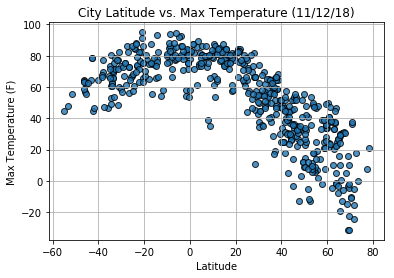

In [8]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

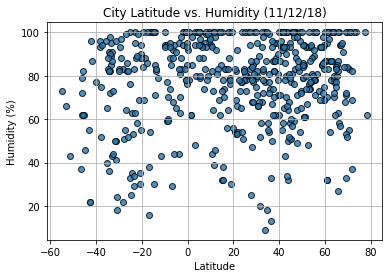

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

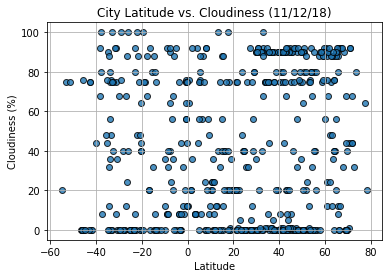

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

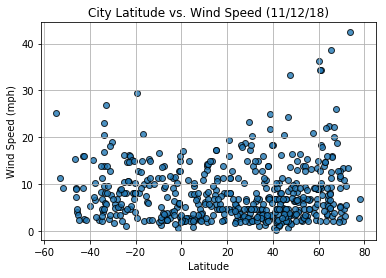

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()